<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Two-sample-test-experiments" data-toc-modified-id="Two-sample-test-experiments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Two-sample test experiments</a></span></li><li><span><a href="#Change-detection-experiments" data-toc-modified-id="Change-detection-experiments-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Change detection experiments</a></span></li></ul></div>

In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [24]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Function to generate a random sequence.
# The sequence may or may not have a change point,
# (mu1,sigma1) are the distribution parameters before the change,
# (mu2,sigma2) are the parameters after the change.
def random_sequence(length, mu1 = 0, sigma1 = 1, change_point=None, mu2=1 ,sigma2 = 1): #ret[change_point] = 1st new pt 
    if change_point == None: change_point = length
    pre_change = sigma1*np.random.randn(change_point)  + mu1
    post_change = sigma2*np.random.randn(length - change_point) + mu2
    ret = np.concatenate((pre_change,post_change))
    return ret

In [6]:
# Demo of a random sequence
random_sequence(10,change_point=5)

array([-2.87970532e-04, -9.16861140e-01, -3.31169144e-01, -1.17473645e-01,
       -1.41839375e-01,  3.07265015e+00,  1.49139428e+00,  8.60727174e-01,
       -9.18947026e-01,  1.65124162e+00])

In [7]:
def k(x,y,alpha=1,sigma2=2): #alpha=1: Laplace kernel. alpha=2: Gaussian
    return np.exp(-pow(np.linalg.norm(x-y),alpha)/sigma2)

#Notes on the kernel parameters: 
# Smaller sigma -> more noisy, rough signal.
# Bigger sigma -> sharper, smooth statistic
# Alpha smaller -> just seems to shrink the signal

In [8]:
def h(x1, y1, x2, y2): #See p. 729 in "a kernel two sample test"
    return k(x1, x2) + k(y1, y2) - k(x1, y2) - k(x2, y1)

# Two-sample test experiments

Task: Determine whether two samples x_1,..,x_n and y_1,...,y_n are from the same distribution.

In [9]:
def linear_stat(x,y): #See p. 739 in "a kernel two sample test"
    m = len(x)/2
    z = 0.
    z_seq = []
    for i in range(0,m):
        z += h(x[2*i], y[2*i], x[2*i+1], y[2*i+1])
        z_seq.append(z/(i+1))
    return np.array(z_seq)

In [10]:
x = random_sequence(1000, mu1 = 5)

In [11]:
y = random_sequence(1000, mu1 = 10)

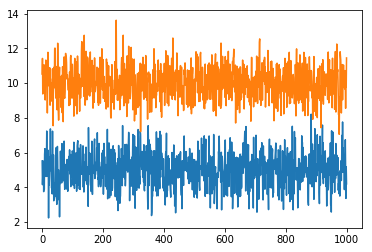

In [12]:
plt.plot(x)
plt.plot(y);

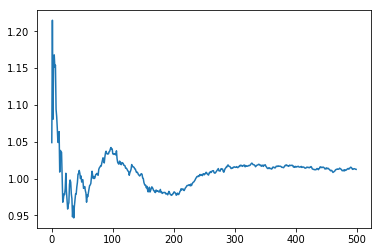

In [13]:
z = linear_stat(x,y); plt.plot(z);

In [14]:
y = random_sequence(1000, mu1 = 6)

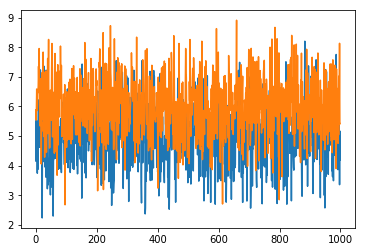

In [15]:
plt.plot(x);plt.plot(y);

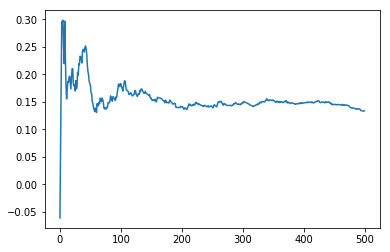

In [16]:
z = linear_stat(x,y); plt.plot(z);

# Change detection experiments

In [17]:
x = random_sequence(length = 1000, mu1 = 5, change_point=500, mu2= 7)

In [18]:
r = random_sequence(length = 1000, mu1 = 5) # Reference signal

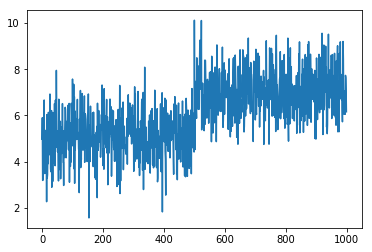

In [19]:
plt.plot(x);

In [20]:
def cd_stat(x,r,delta = 0.1 ): #r for 'reference'
    m = len(x)
    z = 0.
    z_seq = []
    for i in range(0,m-1):
        z = max(0, z + h(x[i], r[i], x[i+1], r[i+1]) - delta)
        z_seq.append(z)
    return np.array(z_seq)

In [21]:
def w_stat(x,r,w=20): #r for 'reference'
    m = len(x)
    z_seq = []
    for i in range(0,m):
        z = 0
        for j in range( max(i-25,0), i-1):
            z = z + h(x[j], r[j], x[j+1], r[j+1])
        z_seq.append(z)
    return np.array(z_seq)

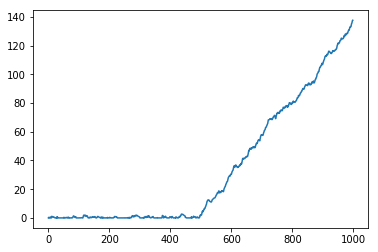

In [22]:
z = cd_stat(x,r); plt.plot(z);

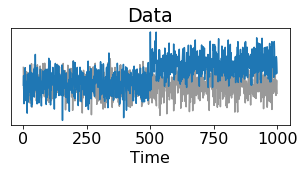

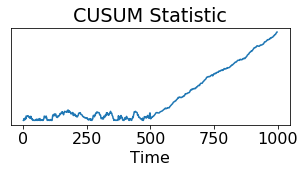

In [65]:
# exaggerated example for visualization
plt.rcParams["figure.figsize"] =(5,3)
plt.rcParams.update({'figure.autolayout': False})
matplotlib.rc('font', **{'size'   : 16})
plt.plot(r,color='0.6');plt.plot(x);
#plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xlabel("Time")
plt.title("Data")
#plt.tight_layout()
plt.gcf().subplots_adjust(top=0.85)
plt.gcf().subplots_adjust(bottom=0.4)

plt.savefig("example1.pdf")
plt.savefig("example1.svg")
plt.figure()
z = cd_stat(x,r,delta=0.02)
z[500:]*=0.2
plt.plot(z)
plt.gca().axes.get_yaxis().set_ticks([])
plt.xlabel("Time")
plt.title("CUSUM Statistic")
#plt.tight_layout()

plt.gcf().subplots_adjust(top=0.85)
plt.gcf().subplots_adjust(bottom=0.4)

plt.savefig("example2.pdf")
plt.savefig("example2.svg")

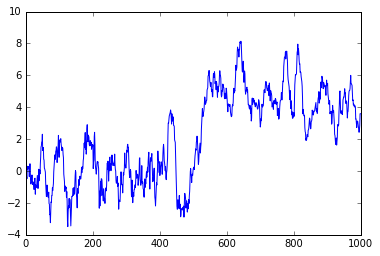

In [48]:
zw = w_stat(x,r); plt.plot(zw)

In [49]:
x = random_sequence(length = 1000, mu1 = 5, change_point=500, mu2= 5, sigma2=0.1)

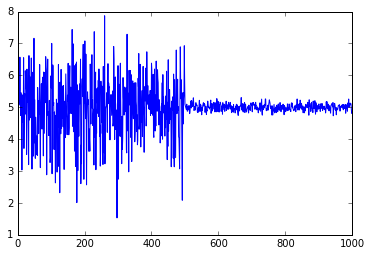

In [50]:
plt.plot(x);

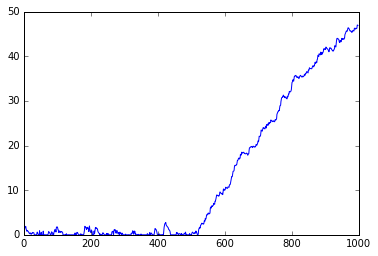

In [51]:
z = cd_stat(x,r); plt.plot(z);

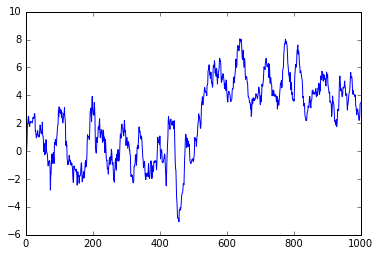

In [53]:
wz = w_stat(x,r); plt.plot(wz)

In [64]:
x = random_sequence(length = 1000, mu1 = 5, change_point=500, mu2= 5, sigma2=1.5)

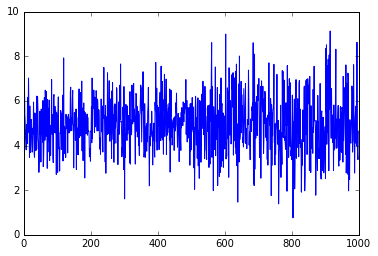

In [65]:
plt.plot(x);

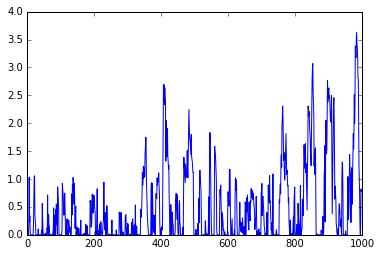

In [66]:
z = cd_stat(x,r); plt.plot(z);

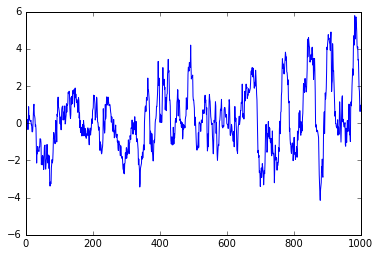

In [67]:
wz = w_stat(x,r); plt.plot(wz);

In [59]:
r = random_sequence(length = 10000, mu1 = 5) # Reference signal

In [60]:
x = random_sequence(length = 10000, mu1 = 5) #no change

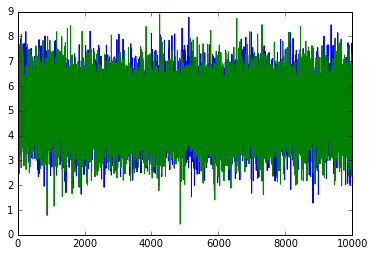

In [61]:
plt.plot(x);plt.plot(r);

(0.0, 16)

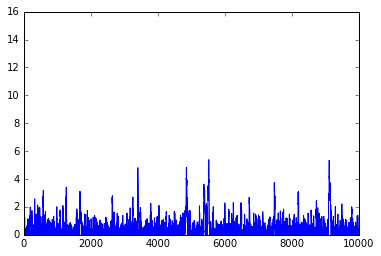

In [62]:
z = cd_stat(x,r); plt.plot(z);plt.ylim(ymax=16)

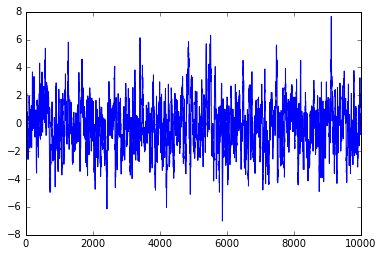

In [63]:
wz = w_stat(x,r); plt.plot(wz);